# Decision trees

## Definition and intuition

A Decision Tree is a supervised predictive model that can learn to predict discrete or continuous outputs by answering a set of simple questions based on the values of the input features it receives. Each branch node represents a choice between a number of alternatives and each leaf node represents a decision.

Following the branches from the root node down (in the direction of the leaf) creates a decision path. Each decision path is pretty much just nested if-else statements where the attributes and values along the path give the characteristics of a data segment (subset).

The algorithms like CART (Classification and Regression Trees) and ID3 (Iterative Dichotomiser 3) are one of the more popular algorithms for tree induction and rely on a number of metrics to choose the best attribute to split. A good split is the one which give us maximum of"gain". There are differentes metrics of "gain" like Gini index, entropy and information gain. 

![Image of a basic decision tree](ressources/decision-tree-animated.gif)

## Interpretability with Decision Trees

Decision trees often mimic the human level thinking so it is simple to understand the data and vizualize the logic of different paths leading to a decision. 

Interpretation can be reached by reading the tree as a bunch of nested if-else statements. At each step along the way, there is an if statement, and you continue down either the true or false branch. Keep doing this until you run out of if statements. That last node without an if statement where you ended up has your answer. The traversed path (nodes) produces the rule explaining the final decision.


### Characteristics 
* **Model-specific**: This is specific to interpreting tree models
* **Global**: The graphical representation of the tree provides a global understanding of the model
* **Local**: We can have insight on how the decision was made for a specific example by following the nodes that led to it 

## Importations

In [1]:
import sklearn as sk
import pandas as pd

# import datasets
from mlinutils.datasets import Bikes, Loans

# Tree model specific
from sklearn import tree

import mlinutils.tree_plots as treep
import mlinutils.sanity as san

In [2]:
#  make plot outputs appear and be stored within the notebook
%matplotlib inline

### Guidance on how to read this notebook

For tree models we will only see its interpretability for two tasks: regression with bike sharing and classification with lending club dataset. For each task we will see how we can interpret the our results (globally and locally).
* <a href=#reg>Regression with bike sharing dataset</a> 
    * <a href=#regm> Model creation and sanity checks </a>
    * <a href=#regg> Global explanation </a>
    * <a href=#regl> Local explanation </a>
* <a href=#clf>Classification with Lending Club dataset</a> 
    * <a href=#clfm> Model creation and sanity checks </a>
    * <a href=#clfg> Global explanation </a>
    * <a href=#clfl> Local explanation </a>

## The datasets we're using 

### Data description
The full description of the Datasets that are used in this entire collection of notebooks is available separately 
* Bike sharing: Daily counts of bike rentals from bike sharing along with weather and seasonal information. <a href="bike_sharing_dataset.ipynb">See bike sharing dataset exploration</a>.
* Lending club: information on users and wether or not they default on their payments from a peer to peer lending online service <a href="lending_club_dataset">see lending club dataset exploration</a>  

### Data importation 

In [3]:
# Importing bike sharing 
bikes = Bikes()

bk_X_train, bk_X_test, bk_y_train, bk_y_test = bikes.load()
bike = bikes.data
bk_names = bikes.feature_names()

### Data preview
Take a peak into the data we'll be using !

In [4]:
bikes.preview()

This dataset contains 17379 instances with 14 attributes


,season,year,month,hour,holiday,week_day,working_day,weather_situation,temperature,felt_temperature,humidity,wind_speed,count,days_since_2011
10357,spring,1.0,March,11am-4pm,0.0,Monday,1.0,Good,25.42,31.060,35.0,30.0026,332.0,436.0
3495,summer,0.0,May,11am-4pm,1.0,Monday,0.0,Good,35.26,39.395,44.0,6.0032,350.0,149.0
13812,fall,1.0,August,5pm-8pm,0.0,Friday,1.0,Medium,34.44,40.150,53.0,19.0012,741.0,580.0
9978,spring,1.0,February,5pm-8pm,0.0,Saturday,0.0,Good,10.66,10.605,33.0,30.0026,149.0,420.0
12708,summer,1.0,June,5pm-8pm,0.0,Monday,1.0,Medium,24.60,29.545,73.0,12.9980,723.0,534.0


### Regression with bike sharing dataset <a name=reg>

#### Model creation and sanity checks <a name=regm>

In [5]:
#model creation
tree_reg = tree.DecisionTreeRegressor(max_depth=3)
tree_reg = tree_reg.fit(bk_X_train, bk_y_train)

> We try to control the maximum depth of the regression tree for two reasons:
* <b>Overfitting:</b>Decision trees are famously prone to overfitting, if we don't control the max depth we will end up with an oveverfitted regressor.
* <b>Interpretability:</b> The more depth we have in the tree the less interpretale it becomes, a good decision tree visualization shouldn't exceed 4 for the depth of the tree to maintain its interpretability 

Plotting the predicted values against the actual values

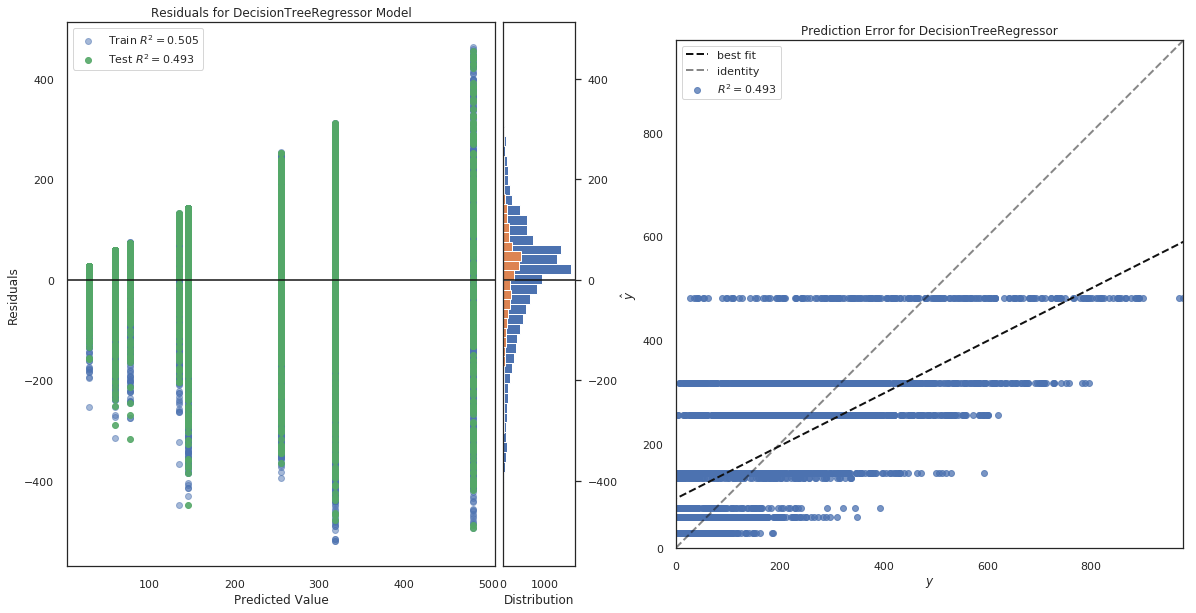

In [6]:
san.regression_sanity_check(tree_reg, bk_X_train, bk_X_test, bk_y_train, bk_y_test)

> The model is not performing as well as we would like mainly because we limited the max_depth. We can observe the effect of hard split which produce "stepped" outcomes (lack of smoothness).

#### Global explanation <a name=regg>
For global explanation we will look at the regression tree fitted on the bike sharing data.

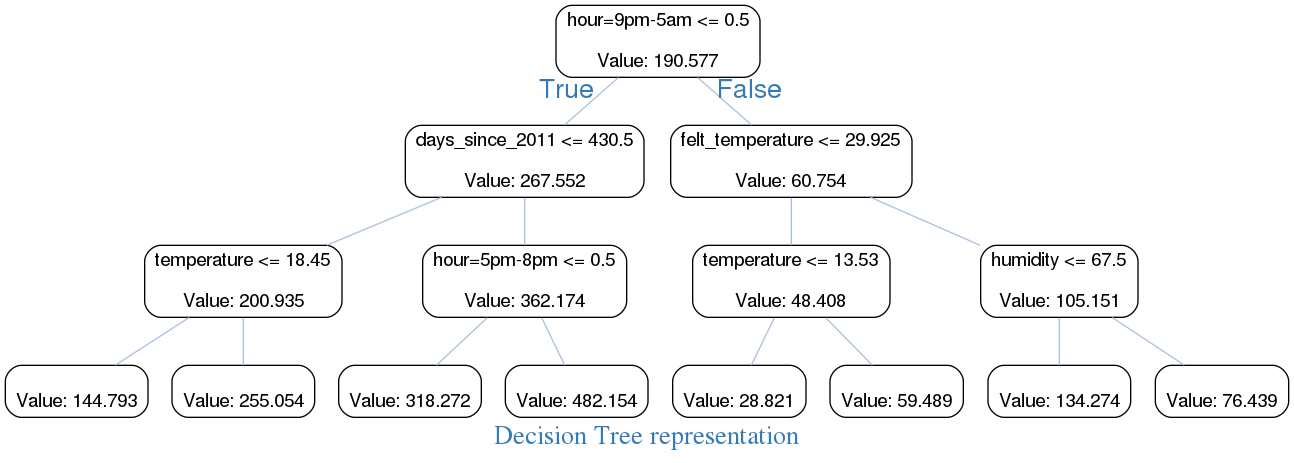

In [7]:
treep.tree_viz(tree_reg, bk_names)

> The first split (root node) was done to the `hour_9pm-5am` feature (a binary feature that takes one when the count record is comprised between 9 p.m. and 5 a.m. or zero otherwise). 

> By looking at the root node, one can understand that during the nigh (right branch) the predicted number of bike rentals 60 whereas if the range hour *is not* comprised between 9pm and 5am the predicted number increases to 267.

> On the second level, tree splits on `days_since_2011` and `felt_temperature` which respectively accounts for the number of days since the first record and the "feels-like" temperature in degree celsius. These features seems to be the most important (globally) for our model.

#### Local explanation <a name=regl>

Looking at the structure of the tree models provided us with a wide and global lecture for predicting the number of bike rentals. At a local level, a single instance prediction, we can follow the path followed by the sample through the tree and get a more accurate insights on reasons taht led to the final prediction.

In [8]:
sample_bike = bk_X_test.iloc[55]

## recovers the original format just for reading convenience
bikes.data.iloc[[sample_bike.name],:]

,season,year,month,hour,holiday,week_day,working_day,weather_situation,temperature,felt_temperature,humidity,wind_speed,count,days_since_2011
16133,winter,1.0,November,9pm-5am,0.0,Friday,1.0,Good,13.12,16.665,81.0,6.0032,162.0,678.0


The prediction that the model made is 28.82 and here's the path that led to it:


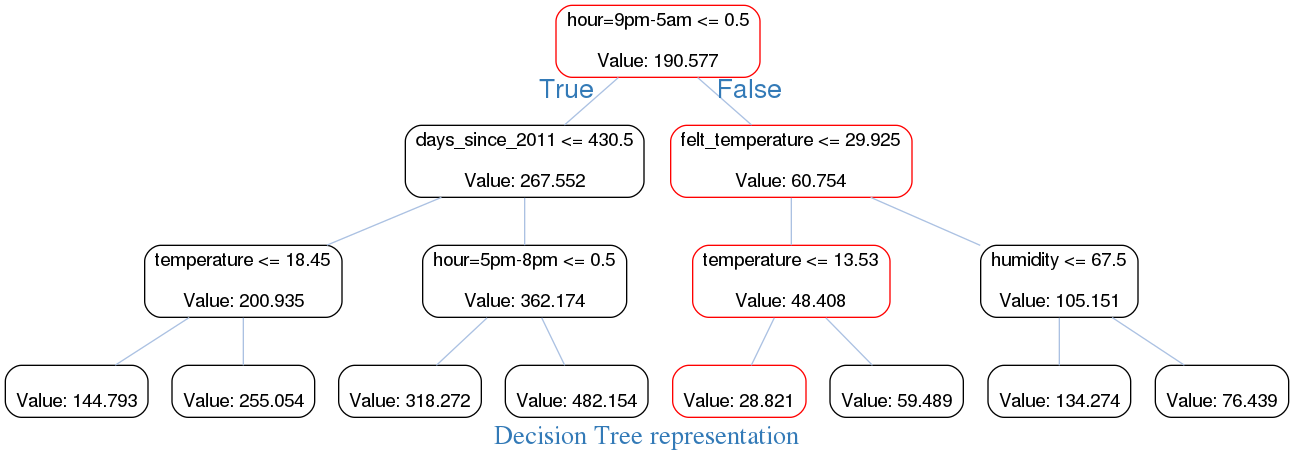

In [9]:
treep.path_viz(tree_reg, bk_names, sample_bike, lambda x: tree_reg.predict(x)[0])

> Following the path from the node root:
* feature `hour_9pm-5am (1) <= 0.5?` False, follow right. Predicted bike rentals at the level is 190.57
* feature `felt_temperature (16.66) <= 29.925?` True, follow left. Predicted bike rentals at the level is 60.75
* feature `temperature (13.12) <= 13.53?` True, follow left. Reach terminal node, Predicted bike rentals is 28.82

### Simplifying Decision Tree Interpretability to coders

We can extract the underlying decision-rules (or 'decision paths') from a fitted tree as a textual code:

In [10]:
treep.tree_to_code(tree_reg, bikes.feature_names())

  if hour=9pm-5am <= 0.5:
    if days_since_2011 <= 430.5:
      if temperature <= 18.450000762939453:
        return [[144.79315831]]
      else:  # if temperature > 18.450000762939453
        return [[255.05368098]]
    else:  # if days_since_2011 > 430.5
      if hour=5pm-8pm <= 0.5:
        return [[318.27234848]]
      else:  # if hour=5pm-8pm > 0.5
        return [[482.15424431]]
  else:  # if hour=9pm-5am > 0.5
    if felt_temperature <= 29.924999237060547:
      if temperature <= 13.529999732971191:
        return [[28.82091593]]
      else:  # if temperature > 13.529999732971191
        return [[59.48878577]]
    else:  # if felt_temperature > 29.924999237060547
      if humidity <= 67.5:
        return [[134.27370304]]
      else:  # if humidity > 67.5
        return [[76.43915344]]


### Classification with Lending Club dataset <a  href=clf>

### Data importation 

In [11]:
## Importing lending club data set
loans = Loans()
ln_X_train, ln_X_test, ln_y_train, ln_y_test = loans.load()
loan = loans.data
ln_names = loans.feature_names()

### Data preview

In [12]:
loans.preview()

This dataset contains 98339 instances with 19 attributes


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,open_acc_6m,inq_fi,mths_since_crl_was_opened,bad_loan_status
57278,30000.0,9.67,963.38,6.0,10.0,MORTGAGE,100000.0,Verified,credit_card,14.92,0.0,0.0,11.0,29554.0,57.4,1.0,1.0,254.001109,1
82573,22000.0,11.99,730.61,6.0,8.0,RENT,90000.0,Source Verified,credit_card,14.17,0.0,0.0,8.0,33844.0,70.2,1.0,1.0,124.027187,0
53415,8875.0,15.10,308.09,5.0,10.0,MORTGAGE,156000.0,Source Verified,debt_consolidation,9.75,0.0,1.0,6.0,9688.0,82.1,1.0,1.0,124.060042,0
21135,10000.0,14.33,343.39,5.0,6.0,MORTGAGE,35000.0,Verified,credit_card,12.51,1.0,0.0,8.0,12326.0,40.5,1.0,1.0,687.981273,0
27042,18000.0,16.29,440.51,5.0,10.0,MORTGAGE,225000.0,Source Verified,debt_consolidation,8.05,1.0,2.0,22.0,8326.0,39.1,1.0,1.0,327.957453,0


#### Model creation and sanity checks <a name=clfm>

In [13]:
# Model creation
tree_clf = tree.DecisionTreeClassifier(max_depth=3)
tree_clf = tree_clf.fit(ln_X_train, ln_y_train)

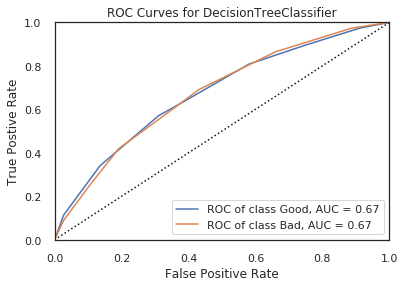

In [14]:
# Sanity checks
san.classification_sanity_check(tree_clf, ln_X_train, ln_X_test, ln_y_train, ln_y_test, classes=["Good", "Bad"])

> Model is performing poorly (AUC = 0.68) which is not really a surprise as we grown a very basic tree with olny three levels of decisions (comprosing accuracy in favor of interpretability).

#### Global explanation <a name=clfg>

The tree structure offers a natural visualization and suit to understand the interactions between fetaures in the data set. 

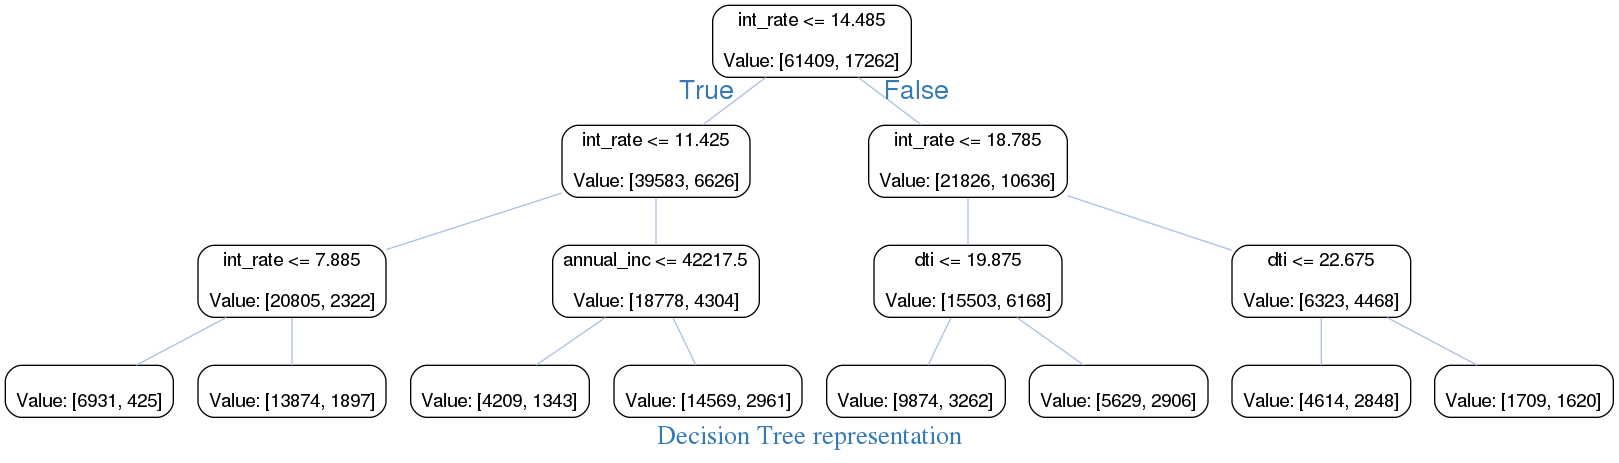

In [15]:
treep.tree_viz(tree_clf, ln_names)

> Again, by looking at the tree structure we can capture global patterns in relation to the prediction of loan default. As we have a classification tree here, `value` accounts for the number of samples for Good class (first element) and samples for Bad class (second element). Probability is then calculed for the class of interest: 
<center><em># of instances for class c / total instances fallen into that node.</em> </center>


> Global interpretation: `int_rate` (interest_rate), `sub_grade` (Lending Club assigned loan grade) and `dti` (dept to income ratio) seems to be important (globally) when predicting for loans default. This is quite logical given that these attributes affect a borrower's ability to repay his loan correctly.

#### Local explanation  <a name=clfl>

Following the path in the direction to a leaf node able us to connect the node by "AND" logic and construct the rule leading to the final decision. Let's see below the prediction for a single instance and the "reasons" for that prediction.

In [16]:
sample_loans = ln_X_test.iloc[42]

## recovers the original format just for reading convenience
loans.data.iloc[[sample_loans.name], :][["loan_amnt","int_rate", "dti", "bad_loan_status"]]

,loan_amnt,int_rate,dti,bad_loan_status
80149,8000.0,14.64,16.89,0


The prediction that the model made is 0.25 and here's the path that led to it:


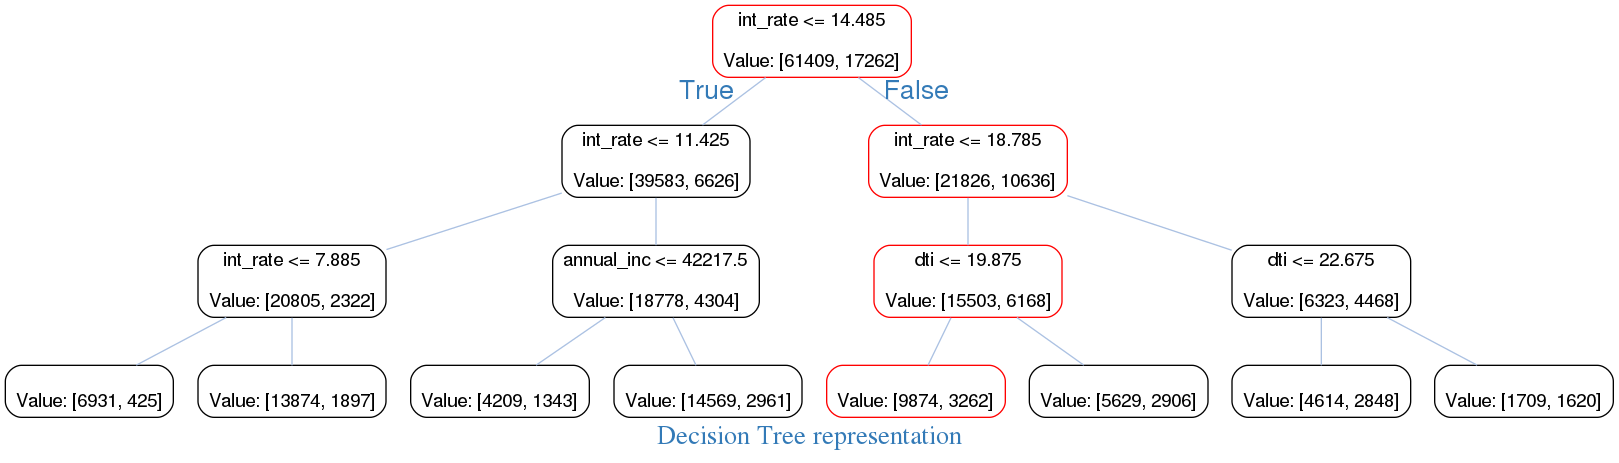

In [17]:
treep.path_viz(tree_clf, ln_names, sample_loans, lambda x: tree_clf.predict_proba(x)[0][1])

> The model outputed a probability of 0.37 for the class `Bad loan` (given a cut-off of 0.5, this instance does not carry enough risk of loan default). Indeed, as we can see in the test set, this instance is a "Good loan" so the model predicted a correct outcome.
* feature `int_rate (19.05) <= 15.585?` False, follow right. P(Bad loan) at this level = 0.21 (46 550/212 624)
* feature `int_rate (19.05) <= 19.23?` True, follow left. P(Bad loan) at this level = 0.34 (24 845/72 547)
* feature `dti (27.21) <= 22.025?` False, follow rigth. Reach terminal node. P(Bad loan) = 0.37 (5 457/14 788)

## Conclusion

Decision Tree models are really easy to interpret given that they don't exceed a certain level of depth and apply to both, global and local interpretability.


#### Advantages:

* Can be used for regression or classification
* Can be displayed graphically
* Highly interpretable
* Can be specified as a series of rules, and more closely approximate human decision-making than other models
* Prediction is fast
* Features don't need scaling
* Automatically learns feature interactions
* Tends to ignore irrelevant features
* Non-parametric (will outperform linear models if relationship between features and response is highly non-linear)


#### Disadvantages:

* Performance is (generally) not competitive with the best supervised learning methods
* Can easily overfit the training data (tuning is required)
* Small variations in the data can result in a completely different tree (high variance)
* Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
* Doesn't tend to work well if the classes are highly unbalanced
* Doesn't tend to work well with very small datasets